In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_7844\2111249569.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
df = pd.read_csv('WHRData2021.csv')
df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 4   Median age                                                                   163 non-null    float64
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

In [6]:
df1 = df.drop(['All-cause death count, 2017','All-cause death count, 2018','All-cause death count, 2019','Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average','All-cause death count, 2020'], axis=1)
df1.dropna(inplace=True)
df1.isnull().sum()

Country name                                                                   0
Population 2020                                                                0
Population 2019                                                                0
COVID-19 deaths per 100,000 population in 2020                                 0
Median age                                                                     0
Island                                                                         0
Index of exposure to COVID-19  infections in other countries as of March 31    0
Log of average distance to SARS countries                                      0
WHO Western Pacific Region                                                     0
Female head of government                                                      0
Index of institutional trust                                                   0
Gini coefficient of income                                                     0
dtype: int64

In [9]:
fig = px.scatter(df1, 
                 x='Median age', 
                 y='Gini coefficient of income', 
                 color='Country name',
                 trendline='ols',
                 trendline_scope='overall',
                 trendline_color_override='black'
                )
fig.show()



In [10]:
pop20 = np.log(df1['Population 2020'])
pop19 = np.log(df1['Population 2019'])

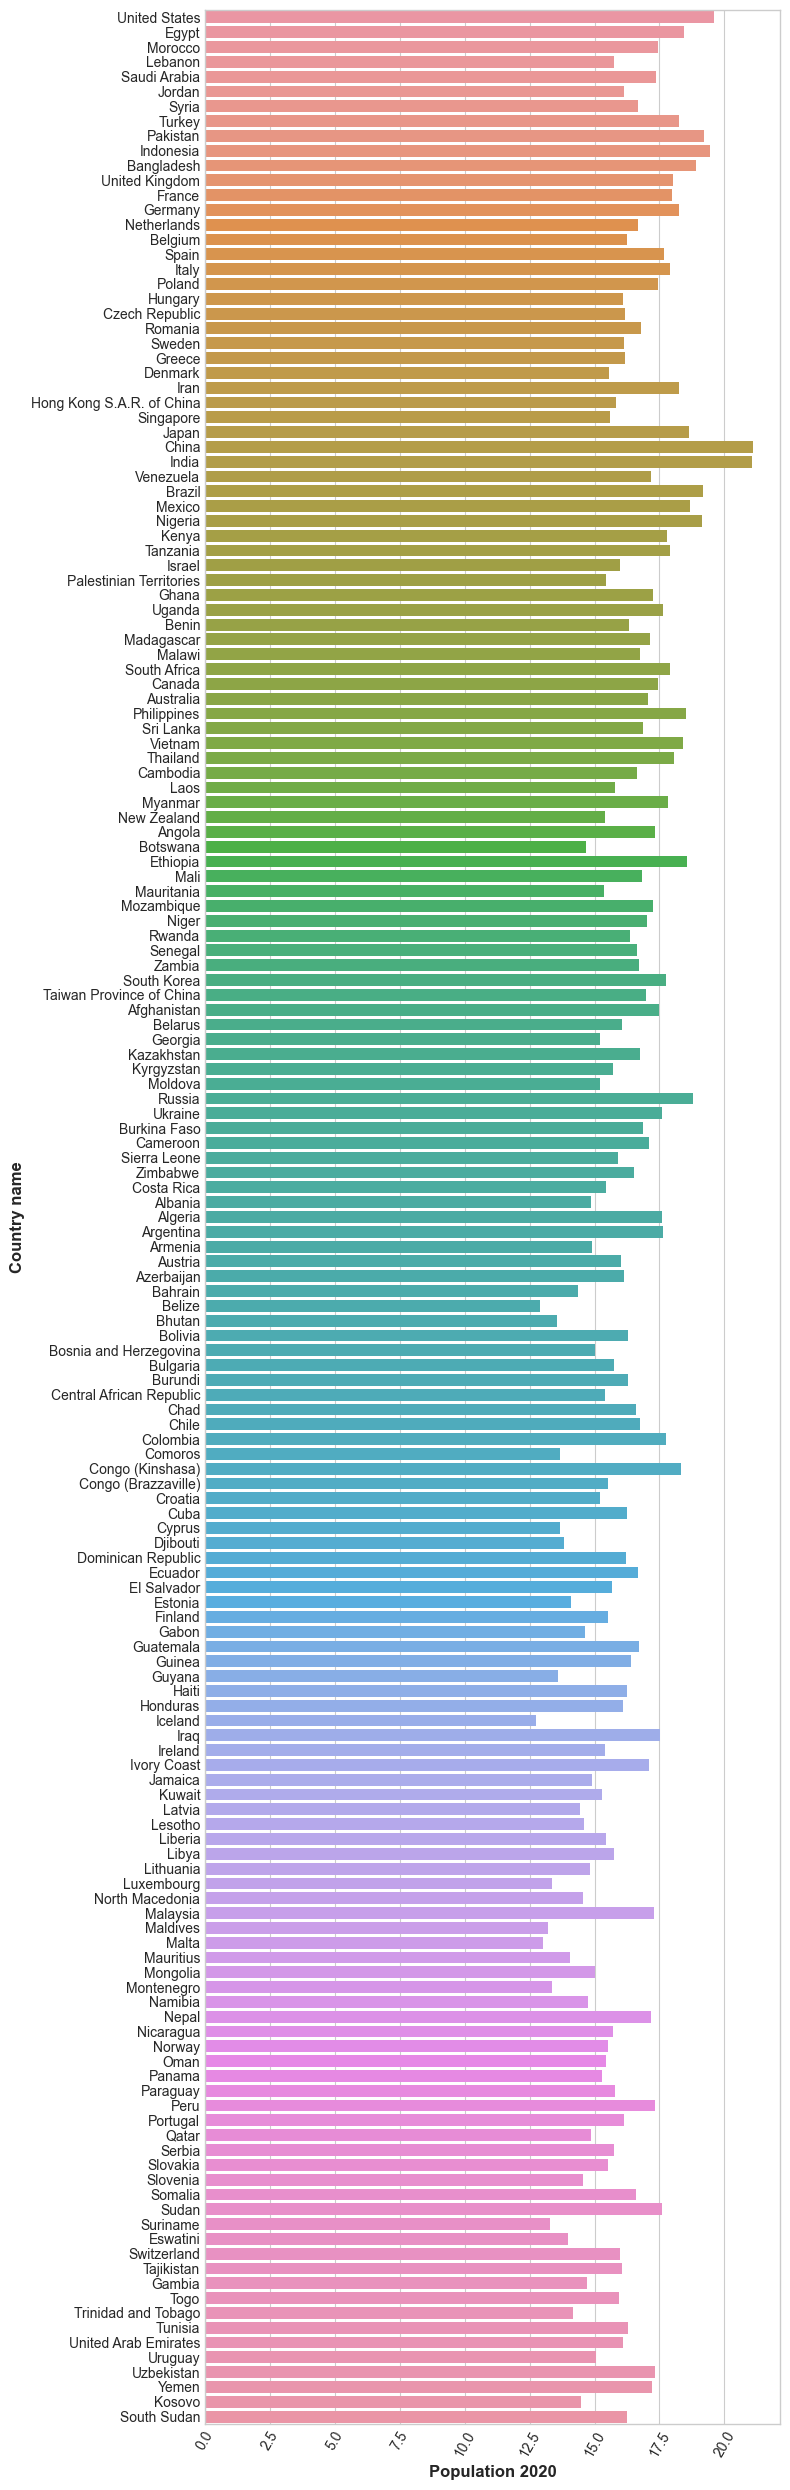

In [11]:
plt.figure(figsize=(8,25))
sns.barplot(y='Country name', x=pop20, data=df1)
plt.xticks(rotation=60)
plt.show()

In [13]:
fig = px.scatter(df1, 
                 x='Population 2020', 
                 y='Median age',
                 color='Country name')

fig.show()

In [16]:
data = df1.loc[:,['Country name','COVID-19 deaths per 100,000 population in 2020']]
datasort = data.sort_values(ascending=False, by='COVID-19 deaths per 100,000 population in 2020').head(10)

fig = px.bar(datasort, 
             x='Country name', 
             y='COVID-19 deaths per 100,000 population in 2020'
             )

fig.update_layout(title_text='Top10 countries with most deaths per 100,000 population')
fig.show()

In [17]:
data = df1.loc[:,['Country name','Population 2020','Population 2019']].sort_values(by='Population 2020',ascending=False).head(10)

fig = go.Figure(data=[go.Bar(name='Population 2020',x=data['Country name'],y=data['Population 2020']),
                      go.Bar(name='Popolation 2019',x=data['Country name'],y=data['Population 2019'])
                     ])

fig.update_layout(barmode='group', title_text='Top10 countries with most population')
fig.show()

C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_7844\1082993287.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



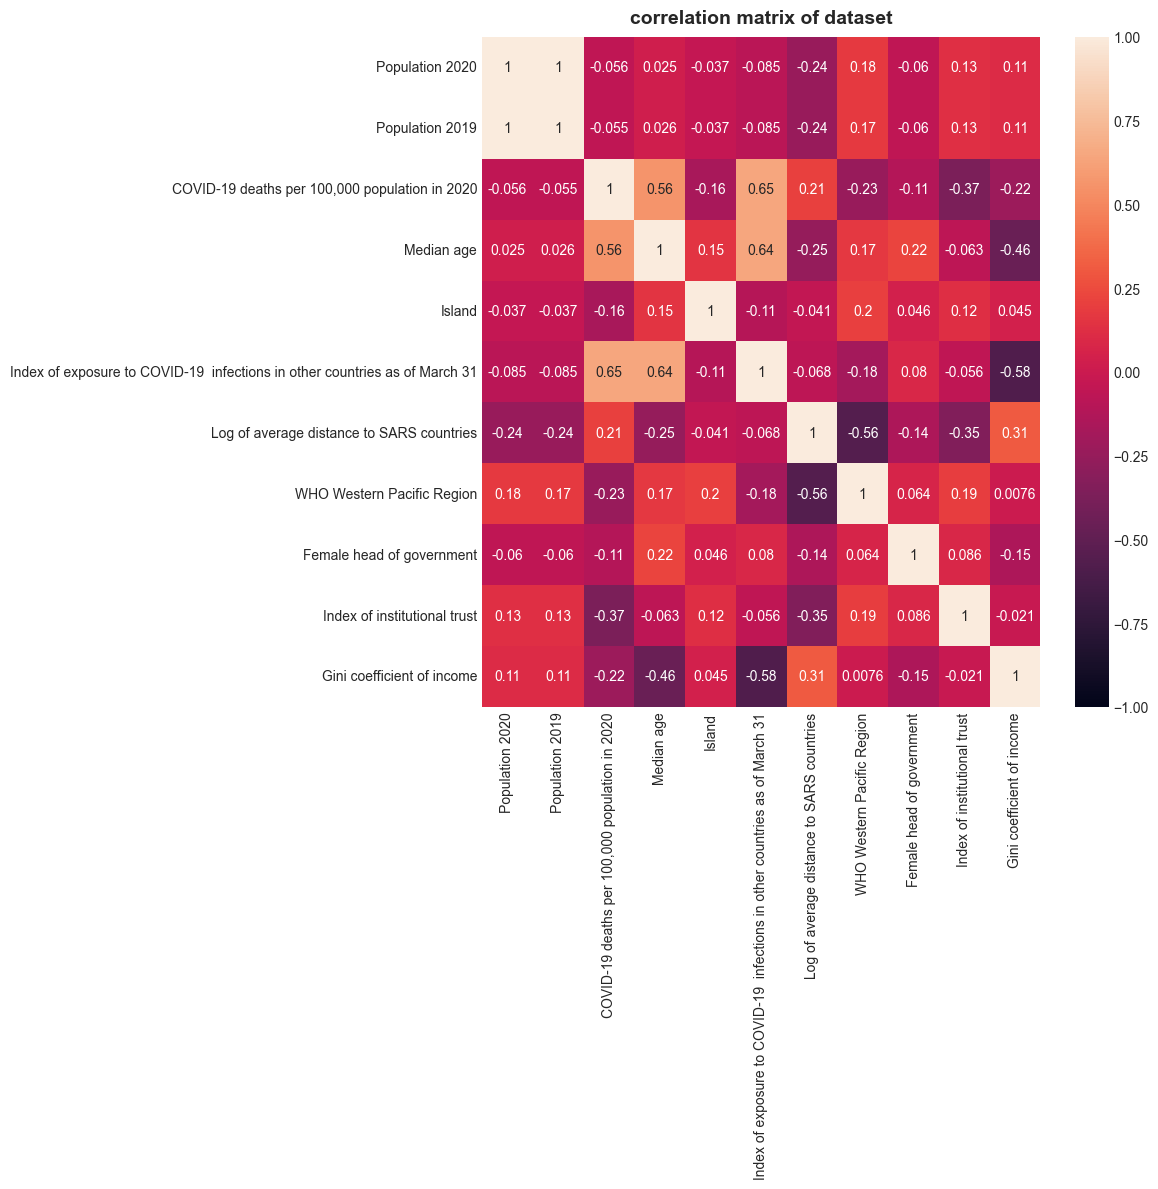

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), 
            vmin=-1, 
            vmax=1, 
            annot=True)

plt.title('correlation matrix of dataset')
plt.show()

In [20]:
data = df1.loc[:,['Country name','Population 2020','Median age','COVID-19 deaths per 100,000 population in 2020']]

In [21]:
fig = px.scatter(data,
x='Median age',
y='COVID-19 deaths per 100,000 population in 2020',
size='Population 2020',
color='Country name',
size_max=50,
hover_name='Country name',
log_x=True
)

fig.update_layout(title_text='Median age VS Covid-19 deaths per 100,000')
fig.show()

In [22]:
#plotting histograms

fig = px.histogram(df1,
x='Median age',
color='Country name',
nbins=4
)

fig.update_layout(bargap=0.2)
fig.show()

In [25]:
data2 = df1.loc[:,['Country name','Index of institutional trust']].sort_values(ascending=False, by='Index of institutional trust').head(10)
fig = px.bar(data2,
x='Country name',
y='Index of institutional trust'
)

fig.update_layout(title_text='Top 10 countries with highest index of institutional trust')
fig.show()

In [27]:
median_df = df1[["Median age"]]
gini_df = df1[["Gini coefficient of income"]]

In [28]:
from sklearn.linear_model import LinearRegression
import seaborn as sb

# EDA: Median Age vs Gini Coefficient of Income
linreg = LinearRegression()
linreg.fit(median_df, gini_df)

regline_x = median_df
regline_y = linreg.intercept_ + linreg.coef_ * median_df

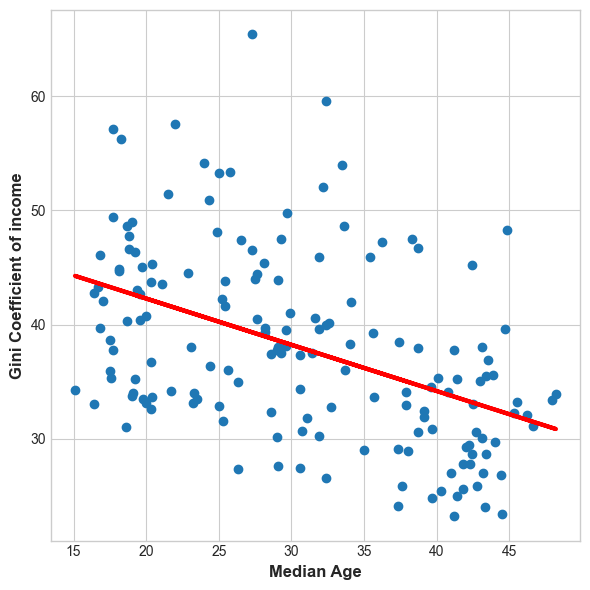

In [29]:
f = plt.figure(figsize=(6,6))
plt.scatter(median_df, gini_df)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.xlabel("Median Age")
plt.ylabel("Gini Coefficient of income")
plt.show()


<AxesSubplot: xlabel='Female head of government', ylabel='Index of institutional trust'>

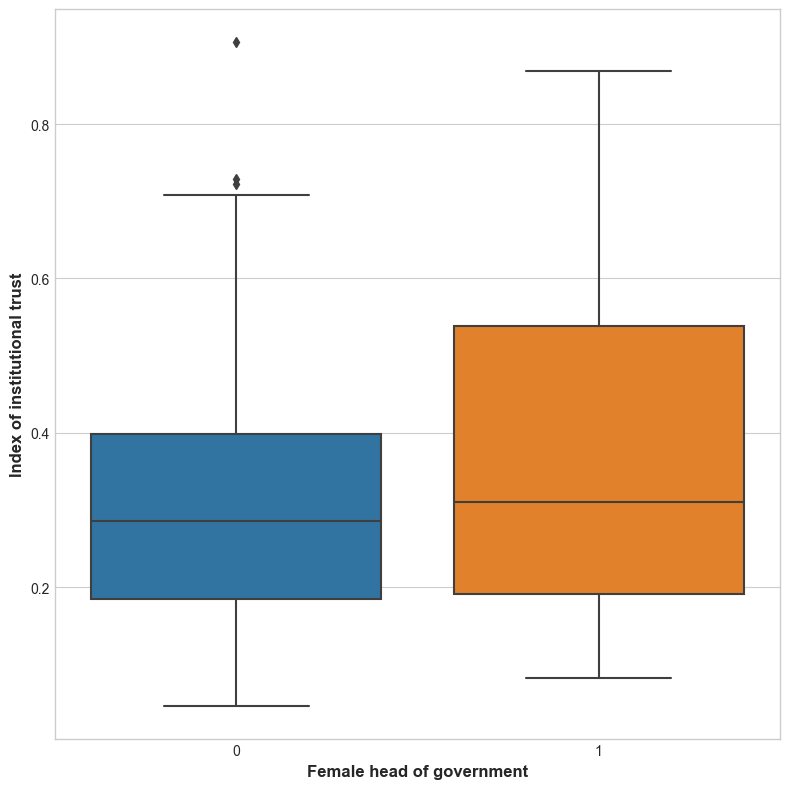

In [31]:
trust_female_df = df1.drop(['Country name', 'Population 2020', 'Population 2019', 'COVID-19 deaths per 100,000 population in 2020',
                                        'Median age', 'Island', 'Index of exposure to COVID-19  infections in other countries as of March 31',
                                        'Log of average distance to SARS countries', 'WHO Western Pacific Region', 'Gini coefficient of income'], axis = 1)

f = plt.figure(figsize=(8, 8))
sb.boxplot(x = 'Female head of government', y = 'Index of institutional trust', data = trust_female_df)


In [32]:
pop_df = df1.drop(['COVID-19 deaths per 100,000 population in 2020',
                    'Median age', 'Island', 'Index of exposure to COVID-19  infections in other countries as of March 31',
                    'Log of average distance to SARS countries', 'WHO Western Pacific Region', 'Gini coefficient of income',
                     'Female head of government', 'Index of institutional trust'], axis = 1)

pop_df = pop_df.sort_values(by=['Population 2020', 'Population 2019'], ascending = False)
pop_top10_df = pop_df.head(n=10)

C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_7844\3379774772.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Country Name')

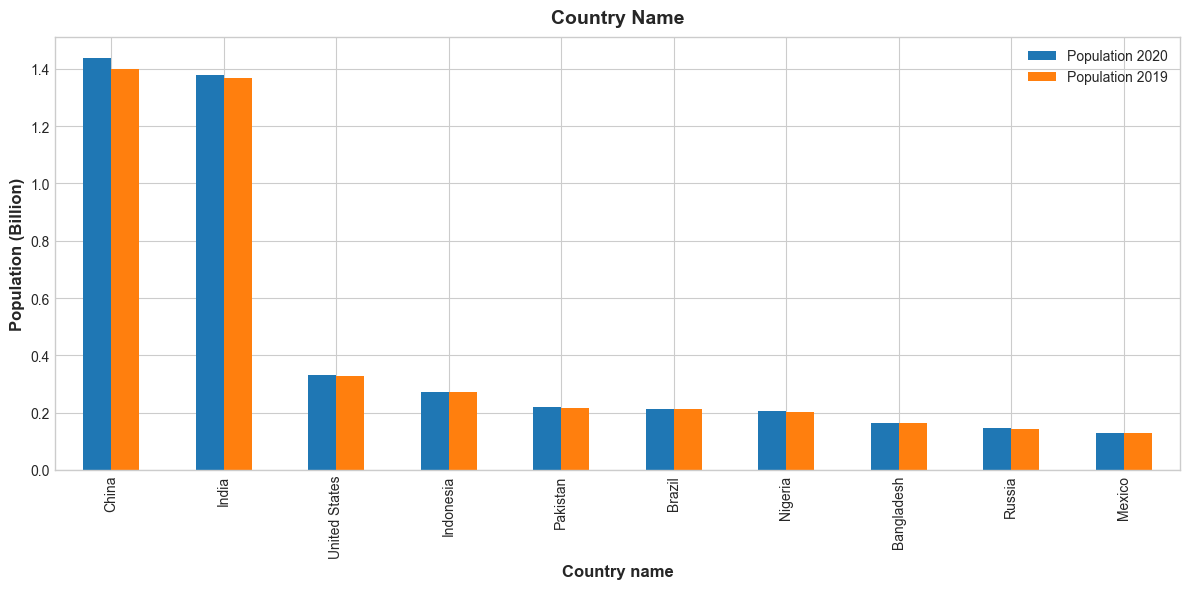

In [33]:
pop_top10_df[['Population 2020', 'Population 2019']] = pop_top10_df[['Population 2020', 'Population 2019']].div(1000000000)

figure, ax = plt.subplots(1,1)
pop_top10_df.plot(x = "Country name", y = ["Population 2020", "Population 2019"], kind = "bar", ax = ax, figsize=(12,6))
ax.set_ylabel('Population (Billion)')
ax.set_title('Country Name')

In [34]:
df2 = df1
df2['Population Increase'] = df2['Population 2020'] - df2['Population 2019']
df2 = df2.drop(['COVID-19 deaths per 100,000 population in 2020',
                'Median age', 'Island', 'Index of exposure to COVID-19  infections in other countries as of March 31',
                'Log of average distance to SARS countries', 'WHO Western Pacific Region', 'Gini coefficient of income',
                'Female head of government', 'Index of institutional trust', 'Population 2020', 'Population 2019'], axis = 1)
df2 = df2.sort_values(by=['Population Increase'], ascending = False)

In [35]:
df2 = df2.head(5).append(df2.tail(5))
df2[['Population Increase']] = df2[['Population Increase']].div(1000000)
df2 = df2.set_index('Country name')


C:\Users\Nithin Kodipyaka\AppData\Local\Temp\ipykernel_7844\1799806819.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 1.0, 'Population Change (Million)')

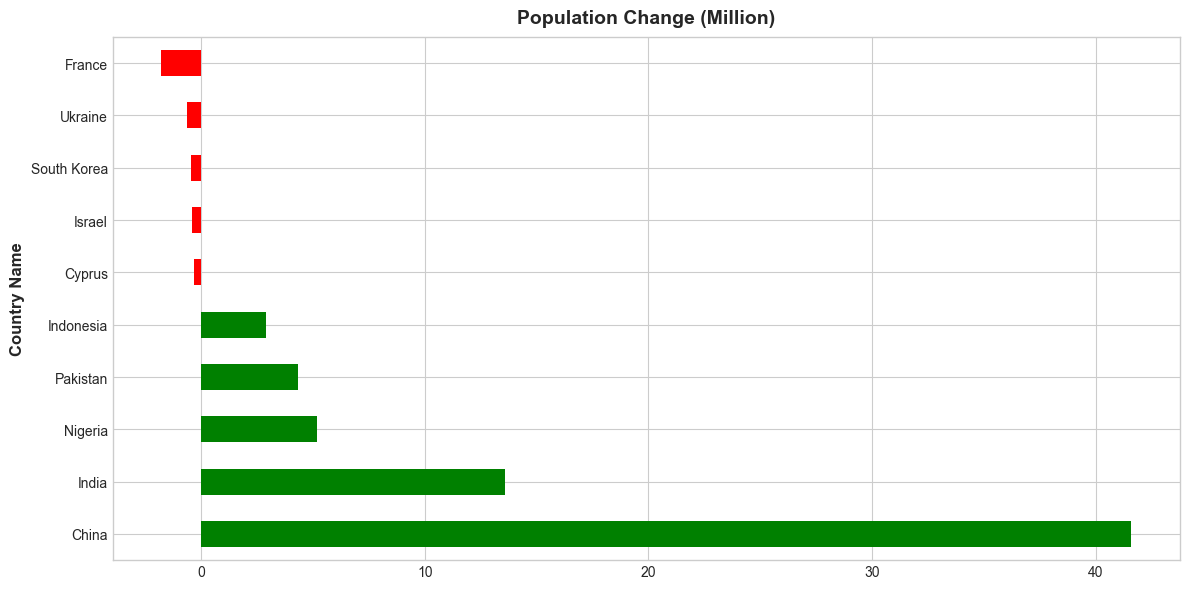

In [36]:
figure, ax = plt.subplots(1,1)
df2['Population Increase'].plot(x = "Country name", y = ["Population Increase"], kind = "barh", ax = ax, figsize=(12,6), legend = False,
                                color=(df2['Population Increase'] > 0).map({True: 'g', False: 'r'}))
ax.set_ylabel('Country Name')
ax.set_title('Population Change (Million)')


In [37]:
pop_increase_df = df1
# Removing anomalies
pop_increase_df = pop_increase_df[pop_increase_df['Population Increase'] < 10000000]
trust_df = pop_increase_df[['Index of institutional trust']]
pop_increase_df = pop_increase_df[['Population Increase']]

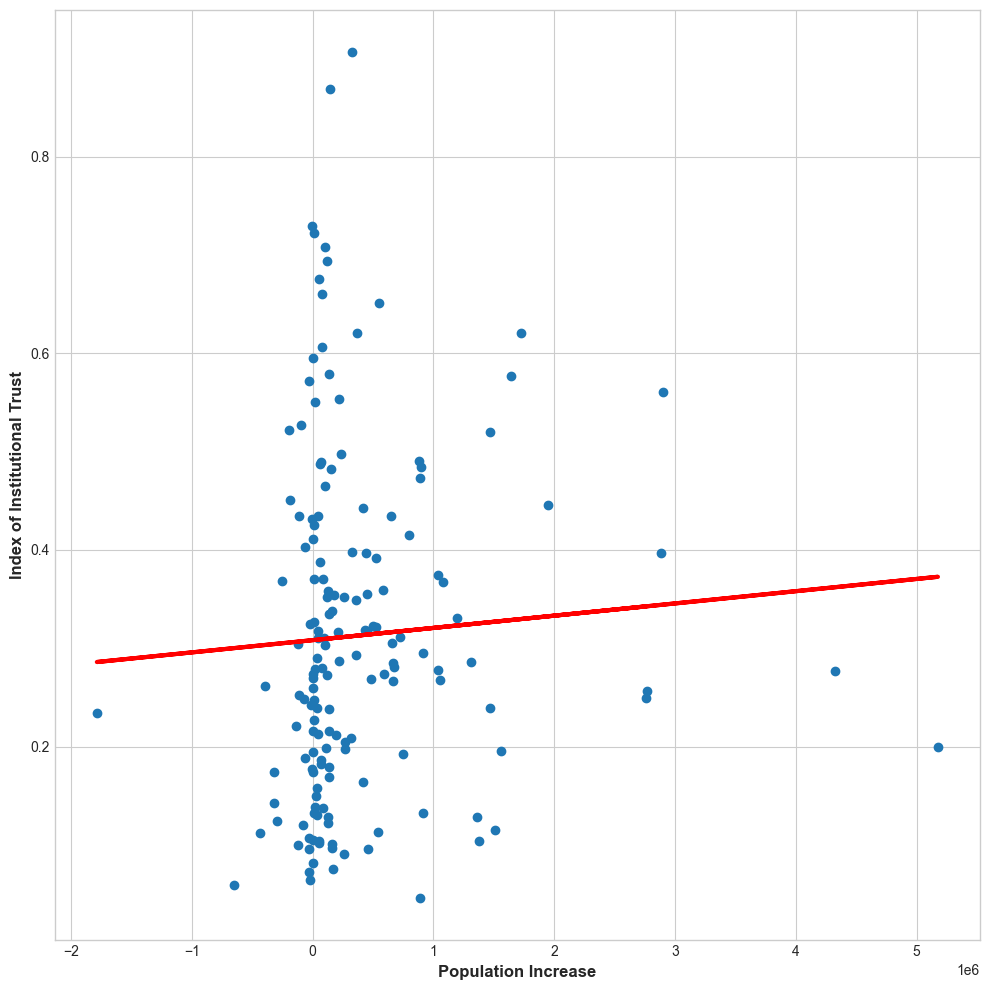

In [38]:
linreg = LinearRegression()
linreg.fit(pop_increase_df, trust_df)

regline_x = pop_increase_df
regline_y = linreg.intercept_ + linreg.coef_ * pop_increase_df

f = plt.figure(figsize=(10,10))
plt.scatter(pop_increase_df, trust_df)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.ylabel("Index of Institutional Trust")
plt.xlabel("Population Increase")
plt.show()


<AxesSubplot: xlabel='Island', ylabel='COVID-19 deaths per 100,000 population in 2020'>

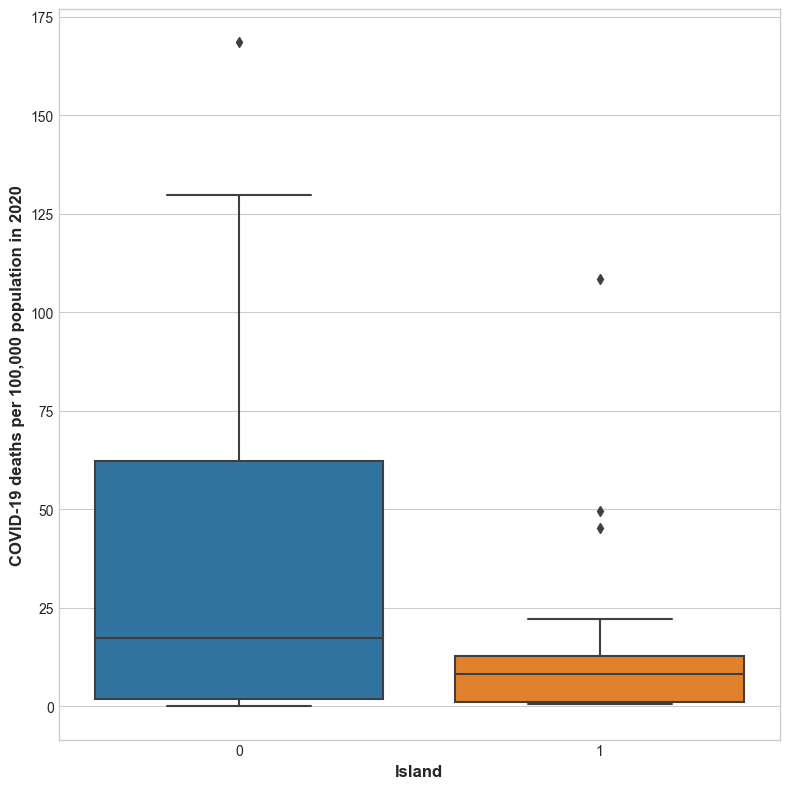

In [39]:
f = plt.figure(figsize=(8, 8))
sb.boxplot(x = 'Island', y = 'COVID-19 deaths per 100,000 population in 2020', data = df1)


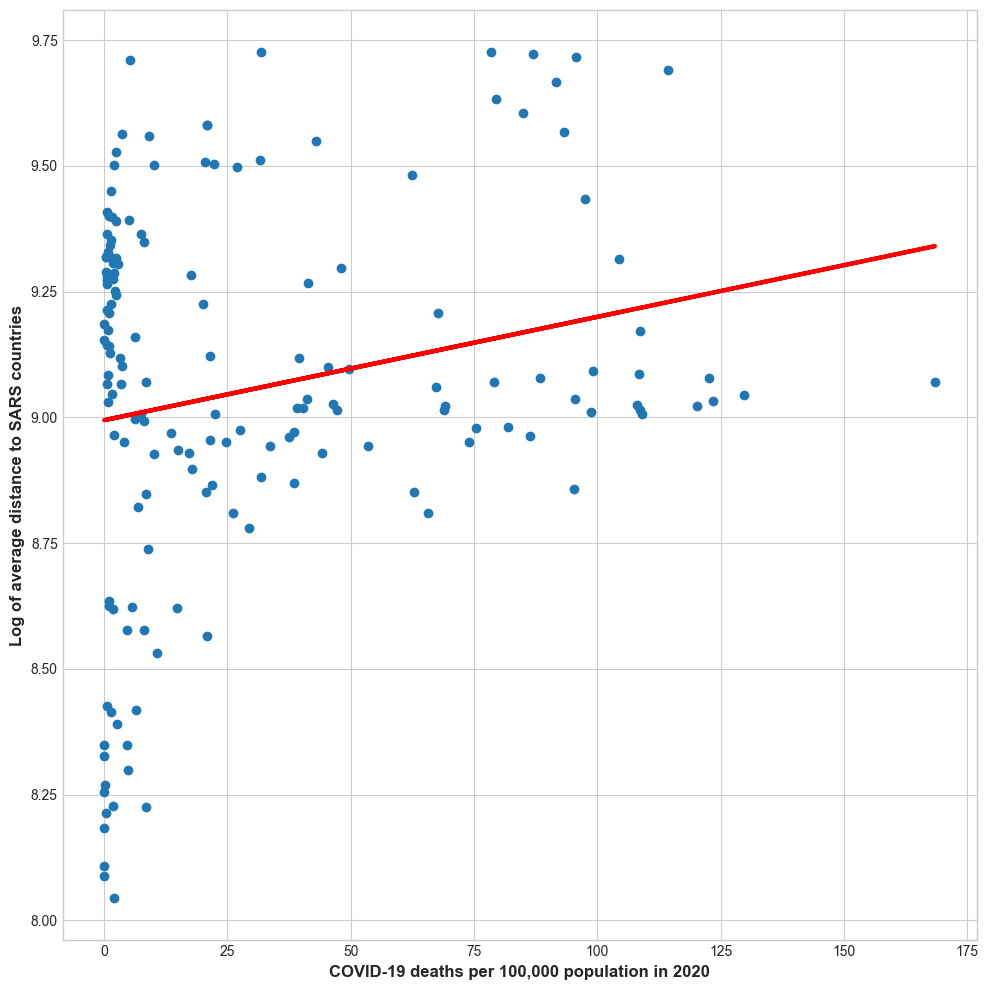

In [40]:
SARS_df = df1[['Log of average distance to SARS countries']]
covid_death_df = df1[['COVID-19 deaths per 100,000 population in 2020']]

linreg = LinearRegression()
linreg.fit(covid_death_df, SARS_df)

regline_x = covid_death_df
regline_y = linreg.intercept_ + linreg.coef_ * covid_death_df

f = plt.figure(figsize=(10,10))
plt.scatter(covid_death_df, SARS_df)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.ylabel("Log of average distance to SARS countries")
plt.xlabel("COVID-19 deaths per 100,000 population in 2020")
plt.show()

In [43]:
# Machine Learning: Predicting Covid-19 Deaths based on the index of exposure to Covid-19 infections in other countries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

index = pd.DataFrame(df1['Index of exposure to COVID-19  infections in other countries as of March 31'])   # Response
death = pd.DataFrame(df1['COVID-19 deaths per 100,000 population in 2020'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(index, death, test_size = 0.25)


In [44]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [-4.3069241]
Coefficients of Regression 	: a =  [[20.13623702]]



In [45]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47841116798129146
Mean Squared Error (MSE) 	: 799.99970181062



In [46]:
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.17022904284812734
Mean Squared Error (MSE) 	: 990.1236841380866



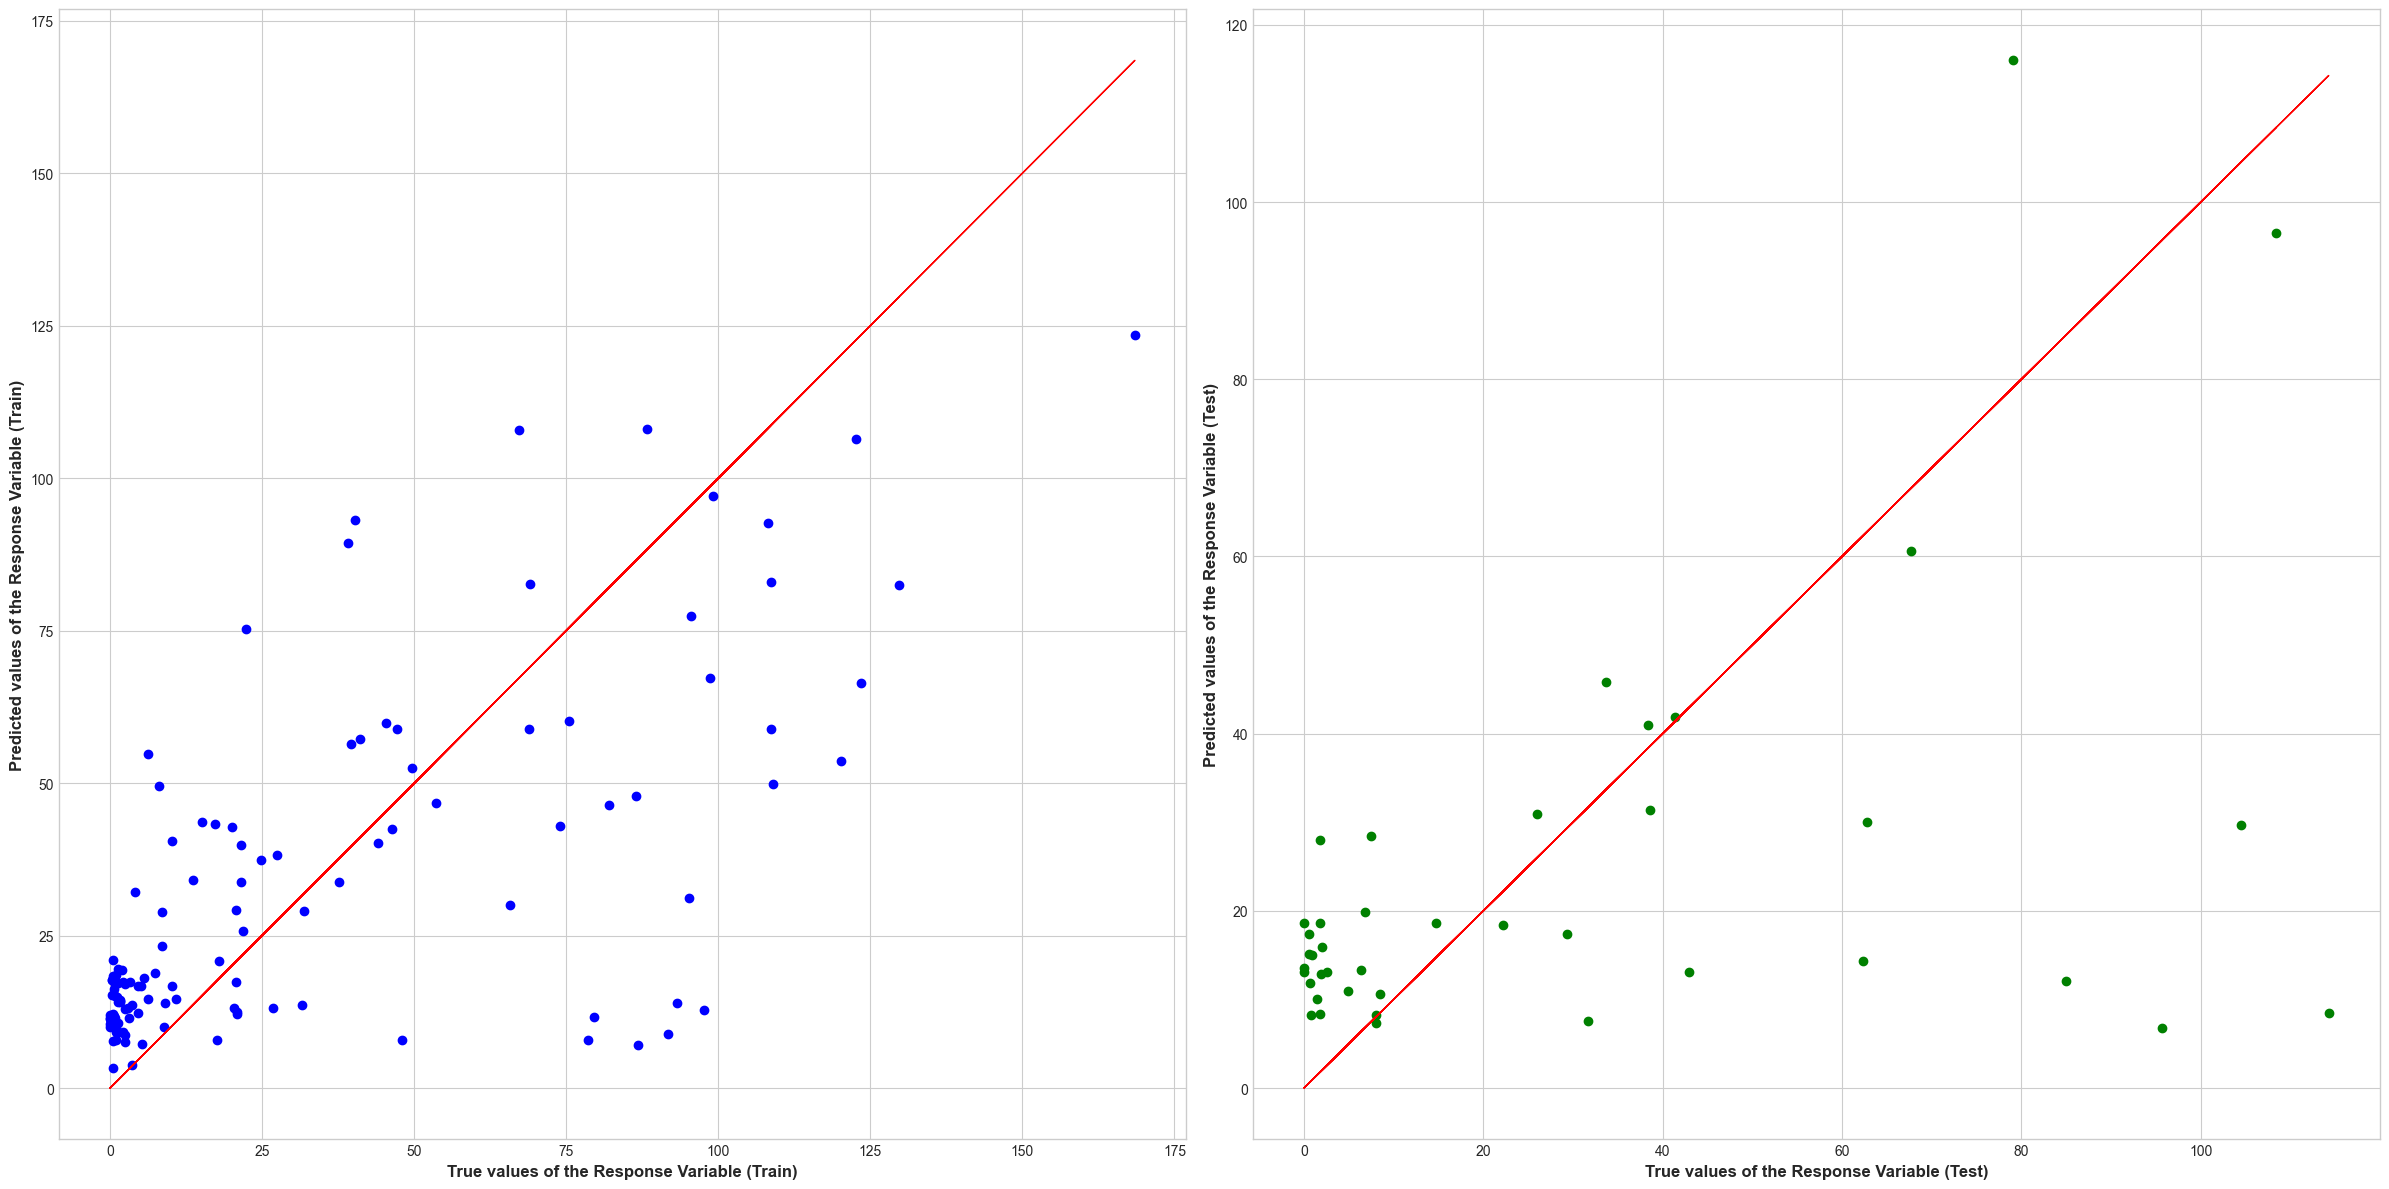

In [47]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()